In [269]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
# https://data.world/health/opioid-overdose-deaths
#overdose_deaths = pd.read_csv('./datasets/bdc/Multiple Cause of Death, 1999-2014 v1.1.csv')

# https://public.opendatasoft.com/explore/dataset/opioid-overdose-deaths-by-type-of-opioid/table/
overdose = pd.read_csv('datasets/bdc/opioid-overdose-deaths-by-type-of-opioid.csv', sep=';')

# https://data.world/carlvlewis/u-s-metro-areas-violent-crime-rates-by-type-1970-2015
crime = pd.read_csv('./datasets/bdc/ucr_crime_1975_2015.csv')

# https://public.opendatasoft.com/explore/dataset/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj/export/
pre_od = pd.read_csv('datasets/bdc/prescription-opioid-overdose-deaths-and-death-rate-per-100000-population-age-adj.csv', sep=';')

# https://public.opendatasoft.com/explore/dataset/opioid-overdose-death-rates-and-all-drug-overdose-death-rates-per-population/export/
overdose_rate = pd.read_csv('./datasets/bdc/opioid-overdose-death-rates-and-all-drug-overdose-death-rates-per-population.csv', sep=';')

In [271]:
us_state_abbrev = {
    'Colorado': 'CO',
    'Washington': 'WA',
}

In [272]:
overdose.columns

Index(['Location', 'Year', 'Heroin', 'Heroin (missing reason)', 'Methadone',
       'Methadone (missing reason)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)',
       'Footnotes'],
      dtype='object')

In [273]:
od_columns = ['Location', 'Year', 'Heroin',
           'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
           'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'
          ]
overdose_col = overdose[od_columns][overdose['Location'] == 'Colorado']
print(overdose_col.shape)

overdose_wash = overdose[od_columns][overdose['Location'] == 'Washington']
print(overdose_wash.shape)

overdose_comb = overdose[od_columns][(overdose['Location'] == 'Colorado') | (overdose['Location'] == 'Washington')]
print(overdose_comb.shape)

(17, 5)
(17, 5)
(34, 5)


In [274]:
GREY = (0, 0, 0, 0.3)
GREY1 = (0.5, 0.5, 0.5, 0.5)
DARKGREY = (0, 0, 0, 0.8)

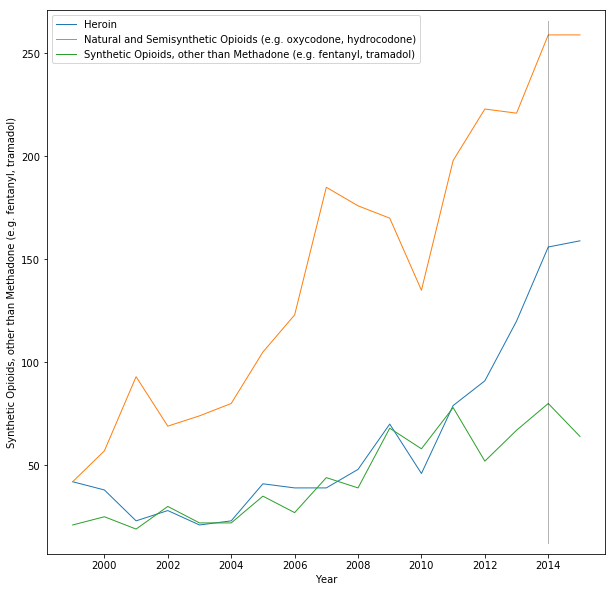

In [275]:
plt.figure(figsize=(10, 10))
for column in od_columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_col, label=column)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

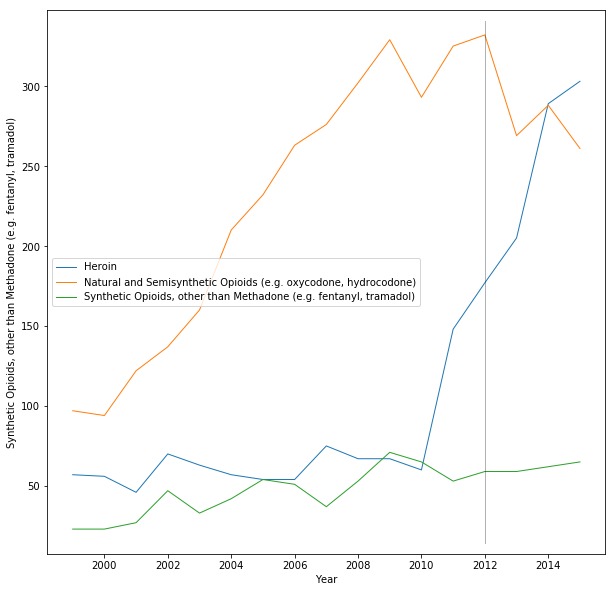

In [276]:
plt.figure(figsize=(10, 10))
for column in od_columns[2:]:
    ax = sns.lineplot(x='Year', y=column, data=overdose_wash, label=column)
plt.axvline(2012, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

In [277]:
crime['State'] = ''

for key, value in us_state_abbrev.items():
    crime['State'][crime['ORI'].str.startswith(value, na=False)] = key

crime.columns

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Index(['ORI', 'year', 'department_name', 'total_pop', 'homs_sum', 'rape_sum',
       'rob_sum', 'agg_ass_sum', 'violent_crime', 'months_reported',
       'violent_per_100k', 'homs_per_100k', 'rape_per_100k', 'rob_per_100k',
       'agg_ass_per_100k', 'source', 'url', 'State'],
      dtype='object')

In [278]:
crime_columns = ['year', 'total_pop', 'violent_per_100k', 'rob_per_100k', 'agg_ass_per_100k']

crime_col = crime[crime_columns][crime['State'] == 'Colorado']
crime_wash = crime[crime_columns][crime['State'] == 'Washington']

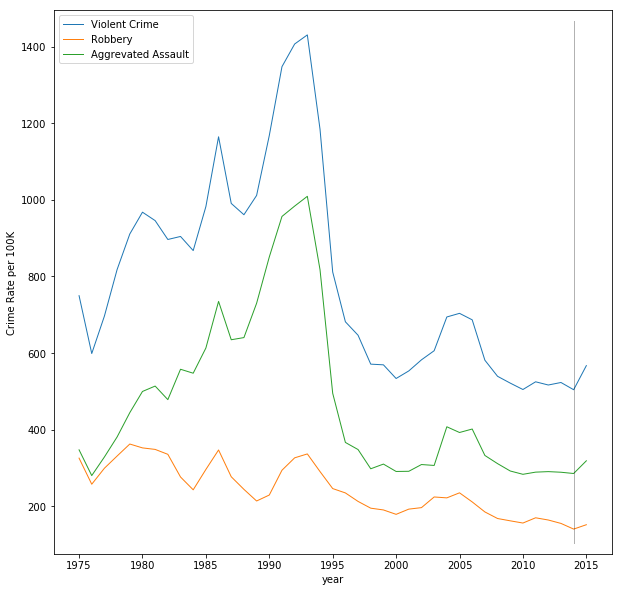

In [279]:
plt.figure(figsize=(10, 10))
labels = {'violent_per_100k': 'Violent Crime',
          'rob_per_100k': 'Robbery',
          'agg_ass_per_100k': 'Aggrevated Assault'
         }
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_col, label=labels[column], ci=None)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.ylabel('Crime Rate per 100K')
plt.show()

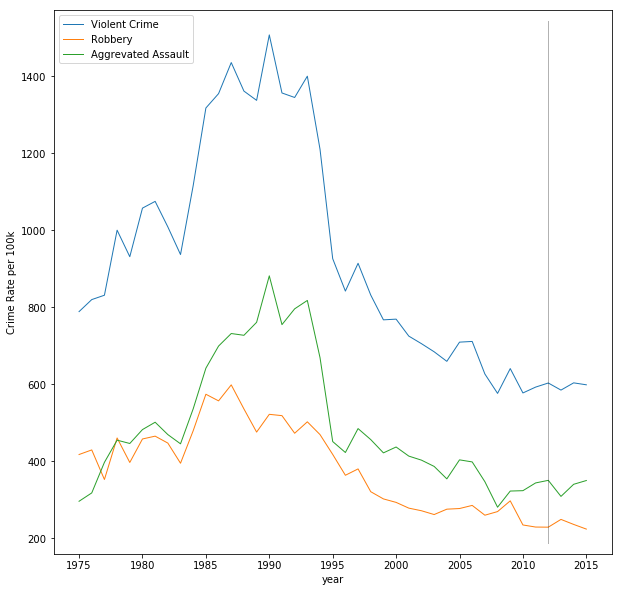

In [280]:
plt.figure(figsize=(10, 10))
for column in crime_columns[2:]:
    ax = sns.lineplot(x='year', y=column, data=crime_wash, label=labels[column])
plt.axvline(2012, 0.02, 0.98, c=GREY, label='Legalization')
plt.ylabel('Crime Rate per 100k')
plt.show()

In [281]:
pre_od.columns

Index(['Location', 'Year', 'Prescription Opioid Overdose Deaths',
       'Prescription Opioid Overdose Deaths (missing reason)', 'Footnotes'],
      dtype='object')

In [282]:
columns = ['Year', 'Prescription Opioid Overdose Deaths']

pre_od_col = pre_od[columns][pre_od['Location'] == 'Colorado']
pre_od_wash = pre_od[columns][pre_od['Location'] == 'Washington']

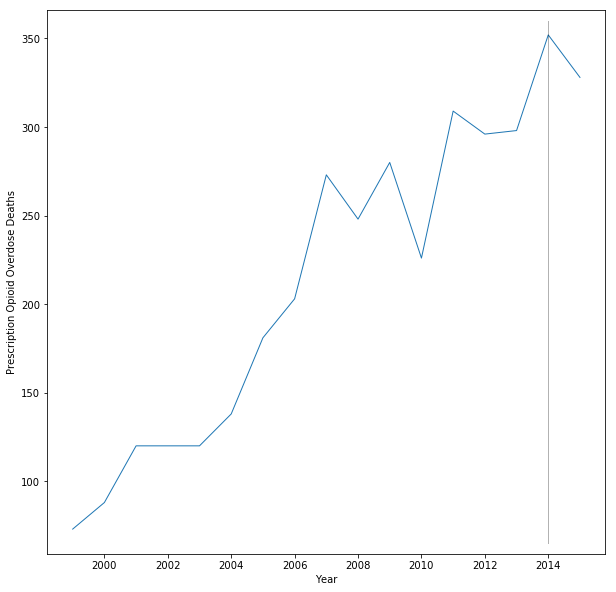

In [283]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_col)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

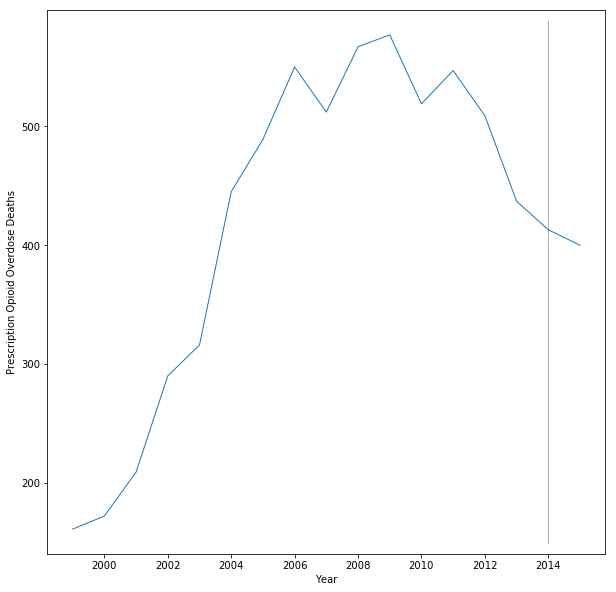

In [321]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Prescription Opioid Overdose Deaths', data=pre_od_wash)
plt.axvline(2014, 0.02, 0.98, c=GREY, label='Legalization')
plt.show()

In [285]:
import statsmodels.api as sm

def calculate_slopes(source, columns, year_label='Year'):
    data = []
    result_columns = []
    for column in columns:
        if column == year_label:
            continue
        result_columns.append(column)
            
        y = source[column]
        x1 = source[year_label]

        x = sm.add_constant(x1)

        results = sm.OLS(y, x).fit()
        
        m = results.params[year_label]
        b = results.params['const']
        
        data.append((m, b))
    
    return pd.DataFrame(columns=result_columns, data=[data])

In [286]:
y = overdose_col[od_columns[2]]
x1 = overdose_col['Year']
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.params

const   -14827.639706
Year         7.419118
dtype: float64

In [287]:
overdose_col_slopes = calculate_slopes(overdose_col, od_columns[1:])
overdose_col_slopes

,Heroin,"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)"
0,"(7.41911764705885, -14827.6397058824)","(13.558823529411795, -27067.323529411828)","(3.7671568627450953, -7516.50735294117)"


In [322]:
overdose_col_before = overdose_col[overdose_col['Year'] <= 2014]
overdose_col_after = overdose_col[overdose_col['Year'] >= 2014]

overdose_wash_before = overdose_wash[overdose_wash['Year'] <= 2014]
overdose_wash_after = overdose_wash[overdose_wash['Year'] >= 2014]

In [323]:
overdose_col_before_lines = calculate_slopes(overdose_col_before, od_columns[1:])
overdose_col_after_lines = calculate_slopes(overdose_col_after, od_columns[1:])

overdose_wash_before_lines = calculate_slopes(overdose_wash_before, od_columns[1:])
overdose_wash_after_lines = calculate_slopes(overdose_wash_after, od_columns[1:])

In [324]:
def make_model(lines, years):
    results = []
    for year in years:
        data = [year]
        for column in lines.columns:
            m = lines[column].iloc[0][0]
            b = lines[column].iloc[0][1]
            data.append(m * year + b)
        results.append(data)
    return pd.DataFrame(columns=['Year'] + lines.columns.tolist(), data=results)

In [325]:
overdose_col_before_model = make_model(overdose_col_before_lines, [1999, 2014])
overdose_col_after_model = make_model(overdose_col_after_lines, [2014, 2015])

overdose_wash_before_model = make_model(overdose_wash_before_lines, [1999, 2014])
overdose_wash_after_model = make_model(overdose_wash_after_lines, [2014, 2015])

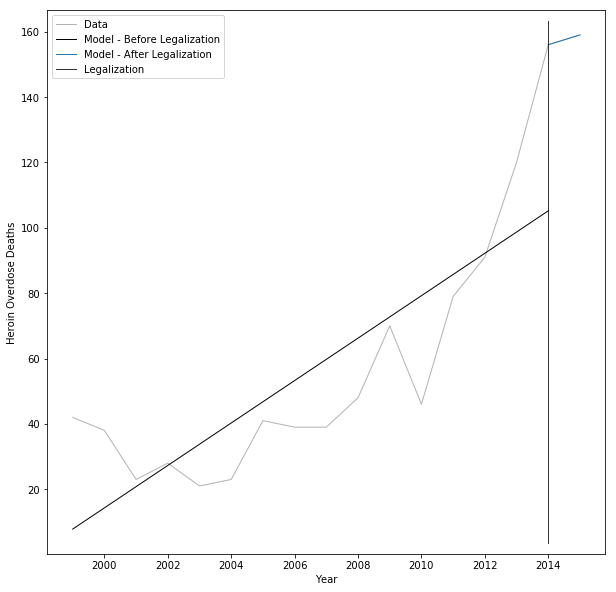

In [326]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col, color=GREY, label='Data')
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col_before_model,
                  label='Model - Before Legalization', color=(0, 0, 0))
ax = sns.lineplot(x='Year', y='Heroin', data=overdose_col_after_model, label='Model - After Legalization')
plt.axvline(2014, 0.02, 0.98, c=DARKGREY, label='Legalization')
plt.ylabel('Heroin Overdose Deaths')
plt.legend(loc='upper left')
plt.show()

In [357]:
def plot_models(label, data, data_before, model_after, ylabel, leg_year=2014, order=1, year='Year'):
    plt.figure(figsize=(10, 10))
    ax = sns.lineplot(x=year, y=label, data=data, color=GREY, label='Data', ci=None)
    ax = sns.regplot(x=year, y=label, data=data_before, label='Model - Without Legalization',
                     order=order, scatter=False, color=GREY1)
    sns.set_context(rc={"lines.linewidth": 3})
    ax = sns.lineplot(x='Year', y=label, data=model_after, label='After Legalization')
    sns.set_context(rc={"lines.linewidth": 1})
    sns.despine()
    plt.axvline(leg_year, 0.02, 0.98, c=DARKGREY, label='Legalization (' + str(leg_year) + ')')
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')
    plt.show()

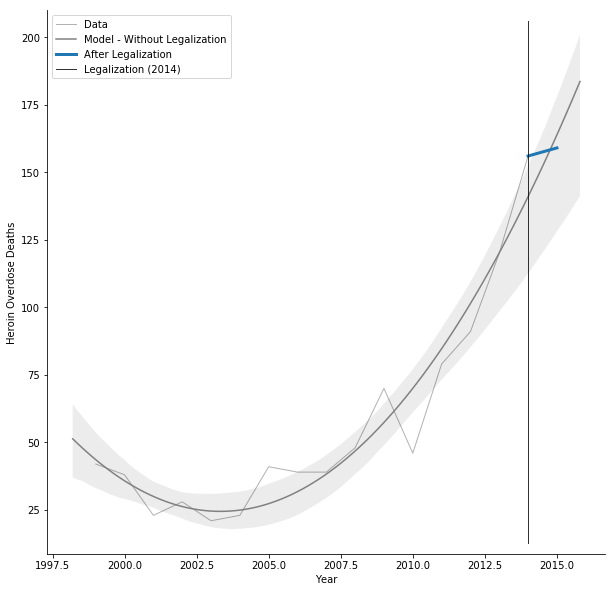

In [358]:
plot_models(od_columns[2], overdose_col, overdose_col_before, overdose_col_after_model,
           od_columns[2] + ' Overdose Deaths', order=2)

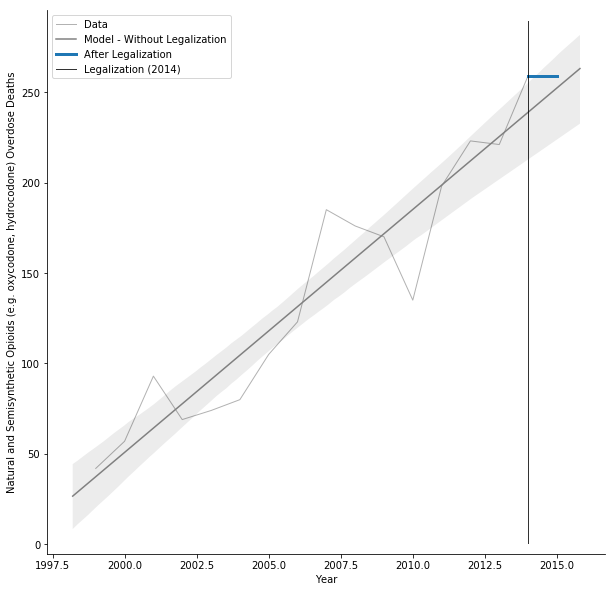

In [359]:
plot_models(od_columns[3], overdose_col, overdose_col_before, overdose_col_after_model,
           od_columns[3] + ' Overdose Deaths')

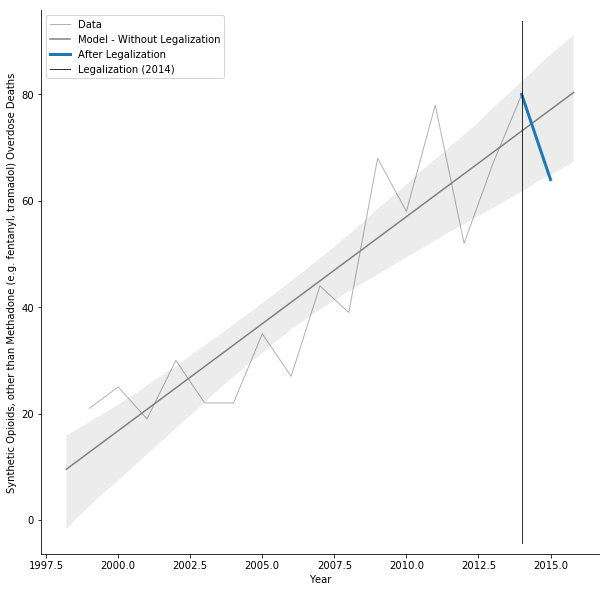

In [360]:
plot_models(od_columns[4], overdose_col, overdose_col_before, overdose_col_after_model,
           od_columns[4] + ' Overdose Deaths')

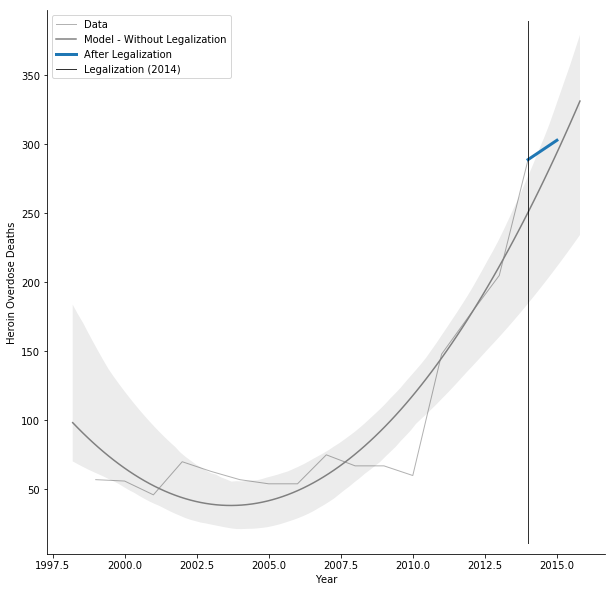

In [361]:
plot_models(od_columns[2], overdose_wash, overdose_wash_before, overdose_wash_after_model,
           od_columns[2] + ' Overdose Deaths', order=2)

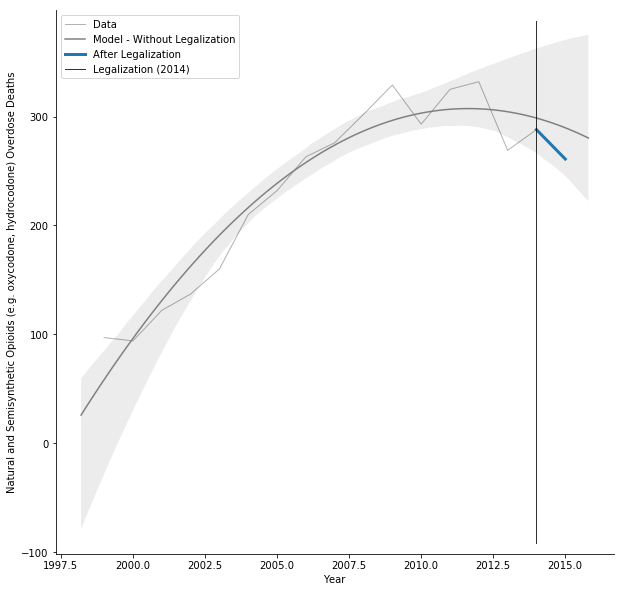

In [362]:
plot_models(od_columns[3], overdose_wash, overdose_wash_before, overdose_wash_after_model,
           od_columns[3] + ' Overdose Deaths', order=2)

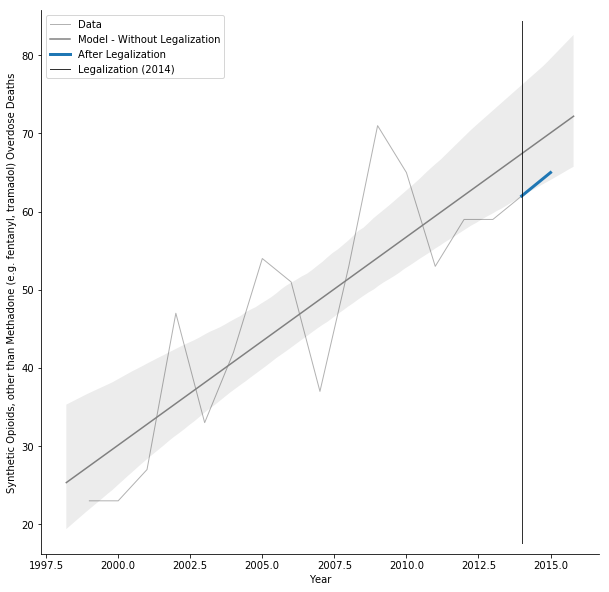

In [363]:
plot_models(od_columns[4], overdose_wash, overdose_wash_before, overdose_wash_after_model,
           od_columns[4] + ' Overdose Deaths')

In [364]:
pre_od_col_before = pre_od_col[pre_od_col['Year'] <= 2014]
pre_od_col_after = pre_od_col[pre_od_col['Year'] >= 2014]

pre_od_wash_before = pre_od_wash[pre_od_wash['Year'] <= 2014]
pre_od_was_after = pre_od_wash[pre_od_wash['Year'] >= 2014]

In [365]:
pre_od_col_after_line = calculate_slopes(pre_od_col_after, ['Prescription Opioid Overdose Deaths'])
pre_od_wash_after_line = calculate_slopes(pre_od_was_after, ['Prescription Opioid Overdose Deaths'])

In [366]:
pre_od_col_after_model = make_model(pre_od_col_after_line, [2014, 2015])
pre_od_wash_after_model = make_model(pre_od_wash_after_line, [2014, 2015])

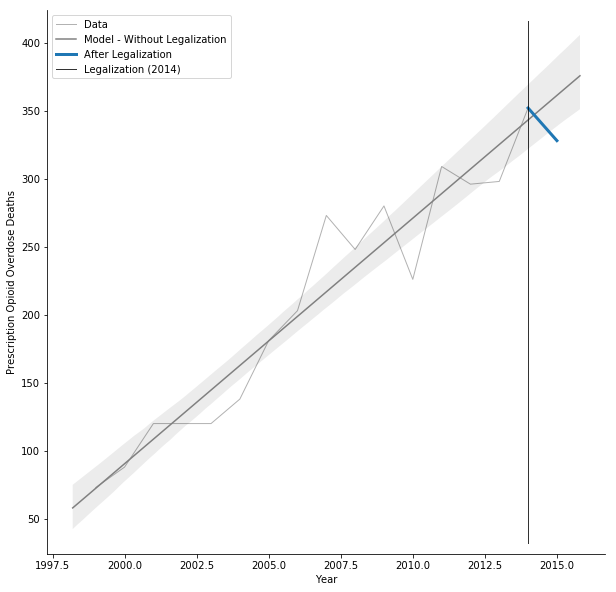

In [367]:
label = 'Prescription Opioid Overdose Deaths'
plot_models(label, pre_od_col, pre_od_col_before, pre_od_col_after_model,
           label)

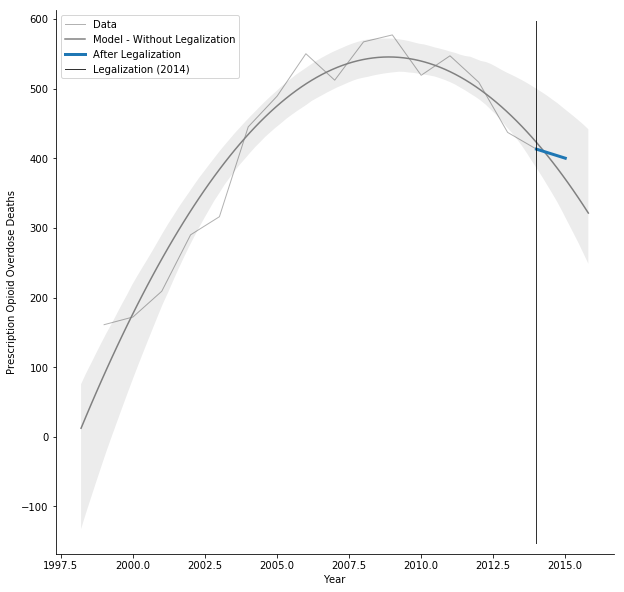

In [368]:
plot_models(label, pre_od_wash, pre_od_wash_before, pre_od_wash_after_model,
           label, order=2)

In [369]:
crime_col_gte99 = crime_col[crime_col['year'] >= 1999]
crime_wash_gte99 = crime_wash[crime_wash['year'] >= 1999]

In [370]:
crime_col_before = crime_col_gte99[crime_col_gte99['year'] <= 2014]
crime_col_after = crime_col_gte99[crime_col_gte99['year'] >= 2014]

crime_wash_before = crime_wash_gte99[crime_wash_gte99['year'] <= 2014]
crime_wash_after = crime_wash_gte99[crime_wash_gte99['year'] >= 2014]

In [371]:
crime_col_after_lines = calculate_slopes(crime_col_after, crime_columns[2:], year_label='year')
crime_wash_after_lines = calculate_slopes(crime_wash_after, crime_columns[2:], year_label='year')

In [372]:
crime_col_after_model = make_model(crime_col_after_lines, [2014, 2015])
crime_wash_after_model = make_model(crime_wash_after_lines, [2014, 2015])

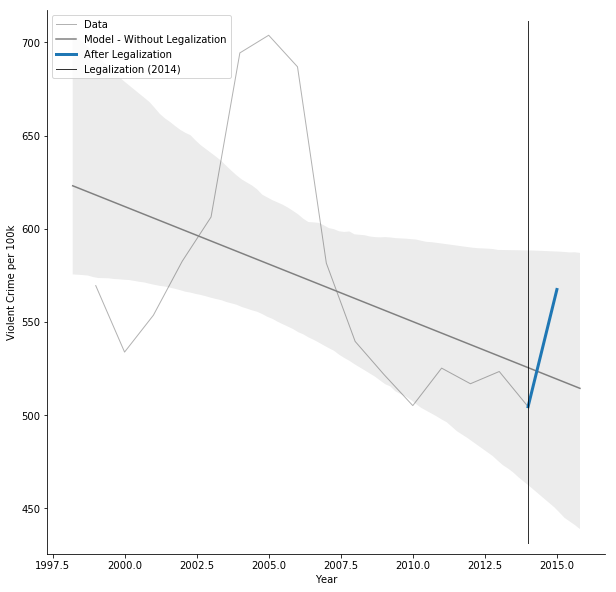

In [373]:
plot_models(crime_columns[2], crime_col_gte99, crime_col_before, crime_col_after_model,
           'Violent Crime per 100k', year='year')

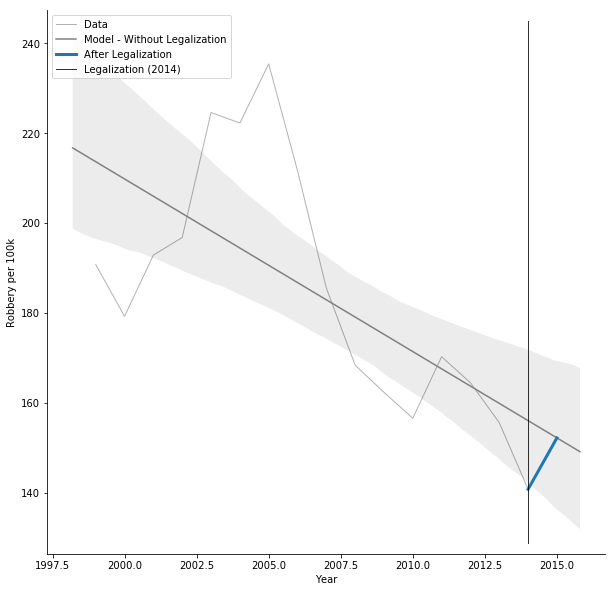

In [374]:
plot_models(crime_columns[3], crime_col_gte99, crime_col_before, crime_col_after_model,
           'Robbery per 100k', year='year')

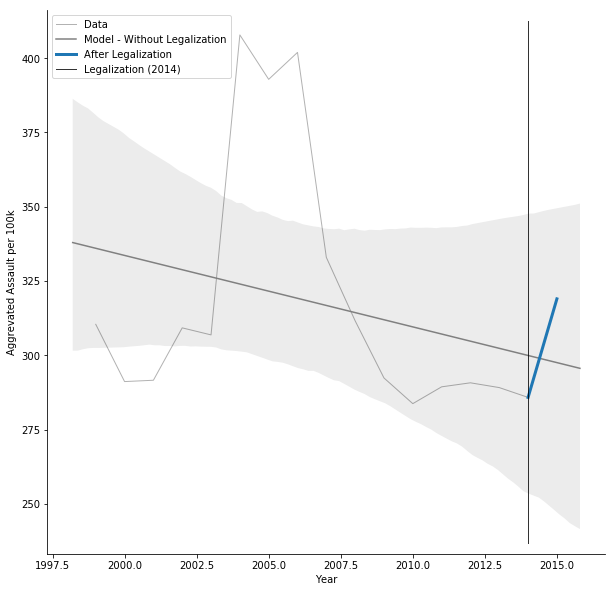

In [375]:
plot_models(crime_columns[4], crime_col_gte99, crime_col_before, crime_col_after_model,
           'Aggrevated Assault per 100k', year='year')

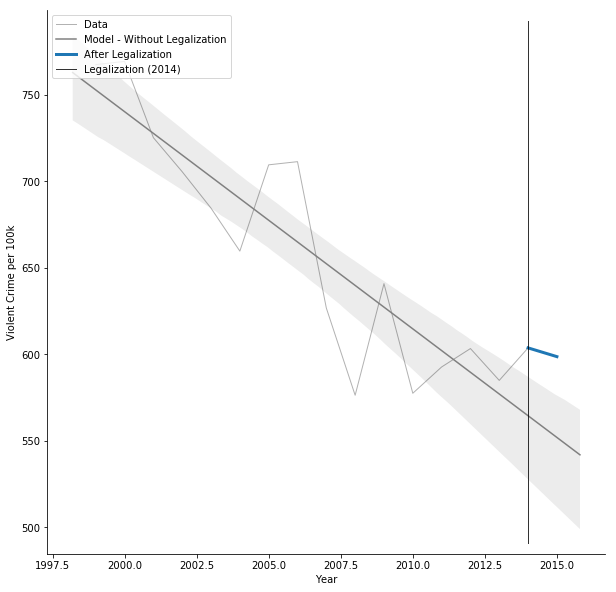

In [376]:
plot_models(crime_columns[2], crime_wash_gte99, crime_wash_before, crime_wash_after_model,
           'Violent Crime per 100k', year='year')

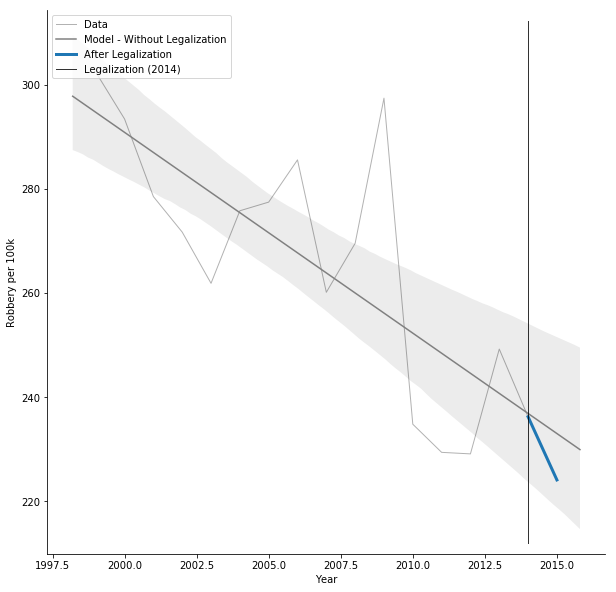

In [377]:
plot_models(crime_columns[3], crime_wash_gte99, crime_wash_before, crime_wash_after_model,
           'Robbery per 100k', year='year')

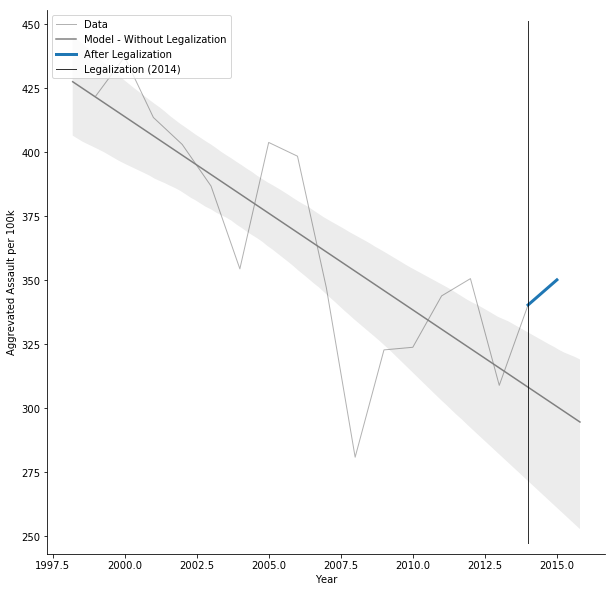

In [378]:
plot_models(crime_columns[4], crime_wash_gte99, crime_wash_before, crime_wash_after_model,
           'Aggrevated Assault per 100k', year='year')

In [379]:
overdose_rate.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,New Jersey,2014,14.0,NaN,8.2,NaN,-0.03,NaN,0.08,NaN
1,Virginia,2014,11.7,NaN,9.1,NaN,0.15,NaN,0.20,NaN
2,Arkansas,2015,13.8,NaN,7.2,NaN,0.10,NaN,0.14,NaN
3,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
4,Missouri,2011,16.4,NaN,10.2,NaN,-0.04,NaN,-0.01,NaN


In [380]:
overdose_rate_col = overdose_rate[overdose_rate['Location'] == 'Colorado']
overdose_rate_wash = overdose_rate[overdose_rate['Location'] == 'Washington']

In [382]:
overdose_rate_col_before = overdose_rate_col[overdose_rate_col['Year'] <= 2014]
overdose_rate_col_after = overdose_rate_col[overdose_rate_col['Year'] >= 2014]

overdose_rate_wash_before = overdose_rate_wash[overdose_rate_wash['Year'] <= 2014]
overdose_rate_wash_after = overdose_rate_wash[overdose_rate_wash['Year'] >= 2014]

In [385]:
overdose_rate_columns = ['All Drug Overdose Death Rate (Age-Adjusted)', 'Opioid Overdose Death Rate (Age-Adjusted)']

overdose_rate_col_after_lines = calculate_slopes(overdose_rate_col_after, overdose_rate_columns)
overdose_rate_wash_after_lines = calculate_slopes(overdose_rate_wash_after, overdose_rate_columns)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [387]:
overdose_rate_col_after_model = make_model(overdose_rate_col_after_lines, [2014, 2015])
overdose_rate_wash_after_model = make_model(overdose_rate_wash_after_lines, [2014, 2015])

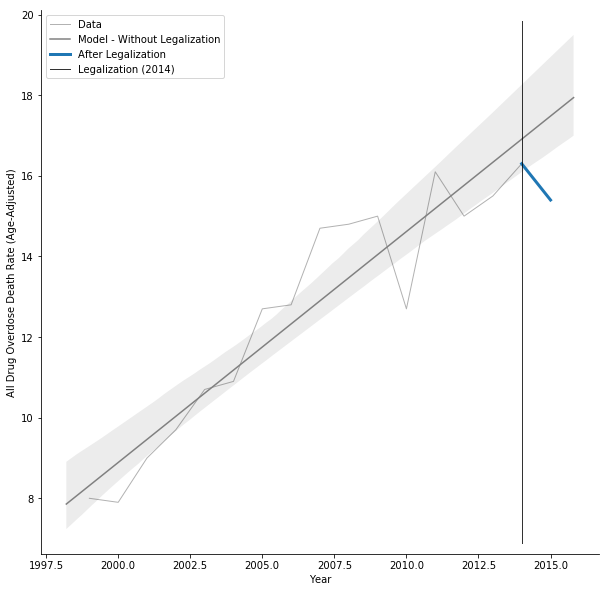

In [388]:
plot_models(overdose_rate_columns[0], overdose_rate_col, overdose_rate_col_before,
            overdose_rate_col_after_model, overdose_rate_columns[0])